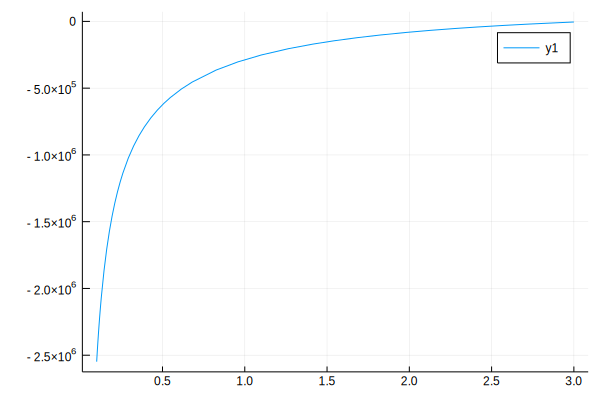

In [38]:
land(x) = -20000*((-0.35*x^2) + (5.25*x) - (14.125*log(abs(x)) - (9.4375*(1/x))))
plot(land, 1/10,3)

In [1]:
# Import 3rd party packages

using DifferentialEquations, StochasticDiffEq, LinearAlgebra, Calculus, Discretizers, KernelDensity, Distributions
using JLD2, FileIO, DataFrames, LaTeXStrings;
using DelimitedFiles,CSV, Query;
using Plots;

In [2]:
#########################################
# Potential function (V): 
# (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x
#########################################

#########################################
# Deterministic Dynamics f(x): 
# -a*x^3+b*x^2+c*x+d
#########################################

#########################################
# noise = linear additive noise
#########################################

#########################################
# Parameters governing function
# a1=0.7
# b1=0.0
# c1=1.0
# d1=0.1
#########################################

####################################
# Stationary points
# stable stat: x=-1.14168; x=1.24240
# saddle: x=-0.100715
####################################

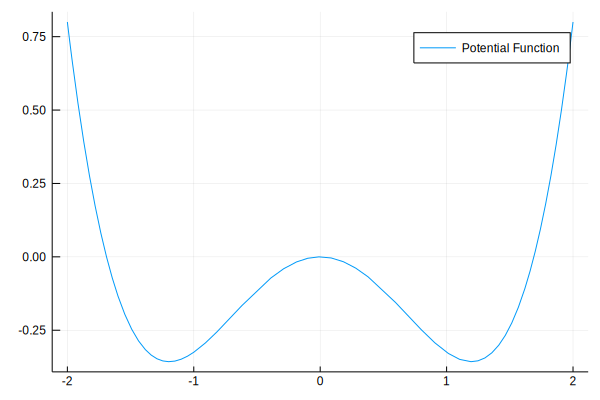

In [3]:
#########################################
# Potential function (V): 
# (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x
#########################################

a1=0.7
b1=0.0
c1=1.0
d1=0.1

f(x) = (a1*x^4)/4 - (b1*x^3)/3 - (c1*x^2)/2 - d1*x

plot(f, -2.0, 2.0, label=("Potential Function"))

In [4]:
##################################################
# ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
##################################################

# Computed analytically using integration

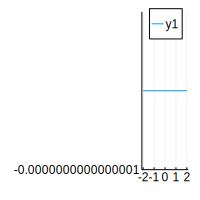

In [7]:
# Clearly, the solution fails at x=0 as it goes to infinity so it would be useful to exclude this point
# Clearly, we also need to normalise the distributions

α = 0.1
f1_ssd(x) = exp((-2log(abs(x))) - ((a1*x^2)/(α^2)) + ((2*b1*x)/(α^2)) + ((2*c1*log(abs(x)))/α^2) - ((2*d1)/(α^2*x)))
plot(f1_ssd,-2.0,2.0,size=(200,200))



-1.96
1.2014464292585633e-59
NaN
NaN


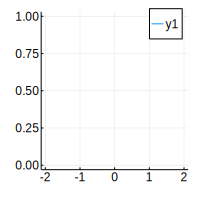

In [8]:
# ATTEMPT TO NORMALIZE THE DISTRIBUTION OVER INTERVAL -2.0:2.0
# Negative values for x generate NaN values and then the plot fails

x = collect(-2.0:0.01:2.0)
println(x[5])
f1_ssd_norm = f1_ssd.(x)
println(f1_ssd_norm[5])
f1_ssd_norm = f1_ssd_norm./(0.01*sum(f1_ssd_norm)) 
println(f1_ssd_norm[5])
println(sum(f1_ssd_norm))
plot(x,f1_ssd_norm,size=(200,200))

0.05
2.0895815461422557e-258
1.7246723196310327e-229


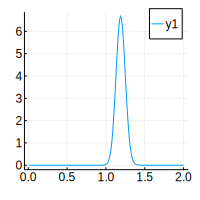

In [9]:
# When I attempt to plot just the positive values for x

# Exclude the point 0 otherwise it fails to plot anything
x = collect(0.01:0.01:2.0)
println(x[5])
f1_ssd_norm = f1_ssd.(x)
println(f1_ssd_norm[5])
f1_ssd_norm = f1_ssd_norm./(0.01*sum(f1_ssd_norm)) 
println(f1_ssd_norm[5])

plot(x,f1_ssd_norm,size=(200,200))

x value: -0.04
function evaluated at x: 1.4429035468342985e-277
normalised value: 1.19092543275798e-248
normalising constant: 100.0


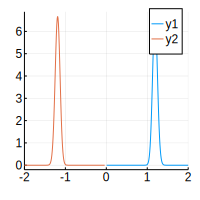

In [10]:
# When I attempt to plot just the negative values for x
# It seems that I can't include the values x=0;0.01;0.02;0.03 - WHY???

# Exclude the point 0 otherwise it fails to plot anything
x = collect(-2.0:0.01:-0.04)
println("x value: ",x[end])
f1_ssd_norm_n = f1_ssd.(x)
println("function evaluated at x: ",f1_ssd_norm_n[end])
f1_ssd_norm_n = f1_ssd_norm_n./(0.01*sum(f1_ssd_norm_n)) 
println("normalised value: ",f1_ssd_norm_n[end])

println("normalising constant: ",sum(f1_ssd_norm_n))
plot!(x,f1_ssd_norm_n,xlims=(-2.0,2.0),size=(200,200))

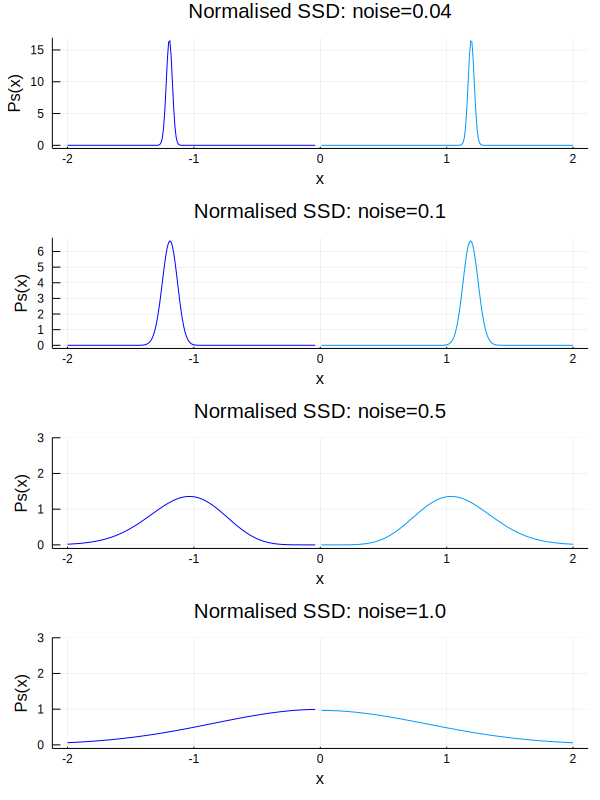

In [11]:
#####################################################
# ADJUSTING NOISE LEVELS AND EFFECT ON NORMALISED SSD
#####################################################

x_pos = collect(0.01:0.01:2.0)

α = 0.04 # lowest noise level we can achieve otherwise solution is undefined
f1_ssd_1(x) = exp((-2log(abs(x))) - ((a1*x^2)/(α^2)) + ((2*b1*x)/(α^2)) + ((2*c1*log(abs(x)))/α^2) - ((2*d1)/(α^2*x)))
f1_ssd_1_norm = f1_ssd_1.(x_pos)
f1_ssd_1_norm = f1_ssd_1_norm./(0.01*sum(f1_ssd_1_norm)) 
plot(x_pos,f1_ssd_1_norm);
x_neg = collect(-2.0:0.01:-0.04)
f1_ssd_1_norm_n = f1_ssd_1.(x_neg)
f1_ssd_1_norm_n = f1_ssd_1_norm_n./(0.01*sum(f1_ssd_1_norm_n))
p1 = plot!(x_neg,f1_ssd_1_norm_n,color=("blue"),legend=false,title=("Normalised SSD: noise=$α"),xlabel=("x"),ylabel=("Ps(x)"))

α = 0.1 
f1_ssd_2(x) = exp((-2log(abs(x))) - ((a1*x^2)/(α^2)) + ((2*b1*x)/(α^2)) + ((2*c1*log(abs(x)))/α^2) - ((2*d1)/(α^2*x)))
f1_ssd_2_norm = f1_ssd_2.(x_pos)
f1_ssd_2_norm = f1_ssd_2_norm./(0.01*sum(f1_ssd_2_norm)) 
plot(x_pos,f1_ssd_2_norm);
x_neg = collect(-2.0:0.01:-0.04)
f1_ssd_2_norm_n = f1_ssd_2.(x_neg)
f1_ssd_2_norm_n = f1_ssd_2_norm_n./(0.01*sum(f1_ssd_2_norm_n))
p2 = plot!(x_neg,f1_ssd_2_norm_n,color=("blue"),legend=false,title=("Normalised SSD: noise=$α"),xlabel=("x"),ylabel=("Ps(x)"))

α = 0.5 
f1_ssd_3(x) = exp((-2log(abs(x))) - ((a1*x^2)/(α^2)) + ((2*b1*x)/(α^2)) + ((2*c1*log(abs(x)))/α^2) - ((2*d1)/(α^2*x)))
f1_ssd_3_norm = f1_ssd_3.(x_pos)
f1_ssd_3_norm = f1_ssd_3_norm./(0.01*sum(f1_ssd_3_norm)) 
plot(x_pos,f1_ssd_3_norm);
x_neg = collect(-2.0:0.01:-0.04)
f1_ssd_3_norm_n = f1_ssd_3.(x_neg)
f1_ssd_3_norm_n = f1_ssd_3_norm_n./(0.01*sum(f1_ssd_3_norm_n))
p3 = plot!(x_neg,f1_ssd_3_norm_n,color=("blue"),legend=false,title=("Normalised SSD: noise=$α"),ylims=(-0.1,3),xlabel=("x"),ylabel=("Ps(x)"))

α = 1.0
f1_ssd_4(x) = exp((-2log(abs(x))) - ((a1*x^2)/(α^2)) + ((2*b1*x)/(α^2)) + ((2*c1*log(abs(x)))/α^2) - ((2*d1)/(α^2*x)))
f1_ssd_4_norm = f1_ssd_4.(x_pos)
f1_ssd_4_norm = f1_ssd_4_norm./(0.01*sum(f1_ssd_4_norm)) 
plot(x_pos,f1_ssd_4_norm);
x_neg = collect(-2.0:0.01:-0.04)
f1_ssd_4_norm_n = f1_ssd_4.(x_neg)
f1_ssd_4_norm_n = f1_ssd_4_norm_n./(0.01*sum(f1_ssd_4_norm_n))
p4 = plot!(x_neg,f1_ssd_4_norm_n,color=("blue"),legend=false,title=("Normalised SSD: noise=$α"),ylims=(-0.1,3),xlabel=("x"),ylabel=("Ps(x)"))

final_ssd = plot(p1,p2,p3,p4,layout=(4,1),size=(600,800))

In [12]:
##################################################
# LANDSCAPE RECOVER FROM U = -LOG(Ps(X))
##################################################

# Computed analytically

In [13]:
# The plot goes to infinity at x=0 so put y on a log scale
# Can recover the positive side of the landscape
# But note that it doesn't perfectly reflect the potential as the landscape when noise is linear - I think this is the
# trouble when noise is multiplicative and we attempt to compute the landscape from U = -log(Ps(x))

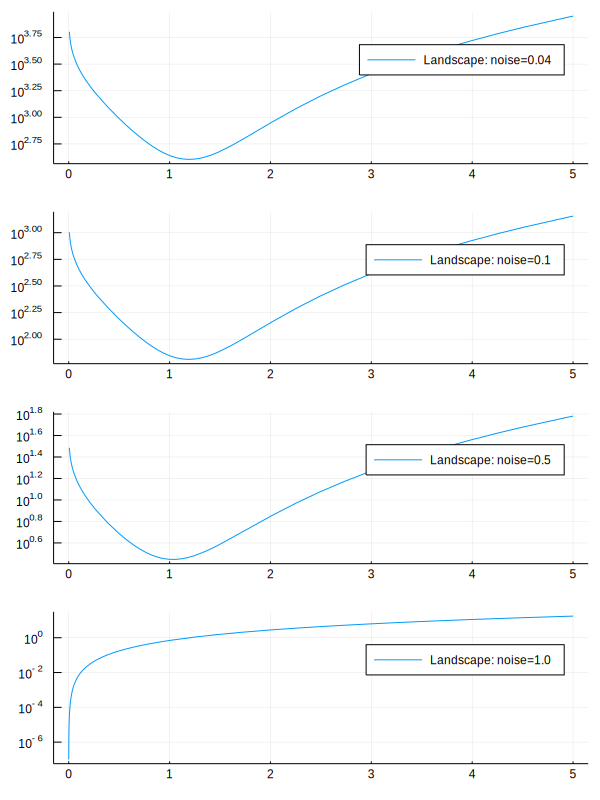

In [14]:
############################
# POSITIVE SIDE OF LANDSCAPE 
############################

# Here we note that an increase in noise not only flattens the landscape by lowering the potential barriers, but
# it shifts the stable stationary points
# Introduces an additional drift term that is induced by noise

α = 0.04
f1_land_1(x) = 2log(x) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
p1_land_1_pos = plot(f1_land_1,yaxis=:log,label=("Landscape: noise=$α"))

α = 0.1
f1_land_2(x) = 2log(x) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
p1_land_2_pos = plot(f1_land_2,yaxis=:log,label=("Landscape: noise=$α"))

α = 0.5
f1_land_3(x) = 2log(x) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
p1_land_3_pos = plot(f1_land_3,yaxis=:log,label=("Landscape: noise=$α"))

α = 1.0
f1_land_4(x) = 2log(x) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
p1_land_4_pos = plot(f1_land_4,yaxis=:log,label=("Landscape: noise=$α"))

plot(p1_land_1_pos,p1_land_2_pos,p1_land_3_pos,p1_land_4_pos,layout=(4,1),size=(600,800))

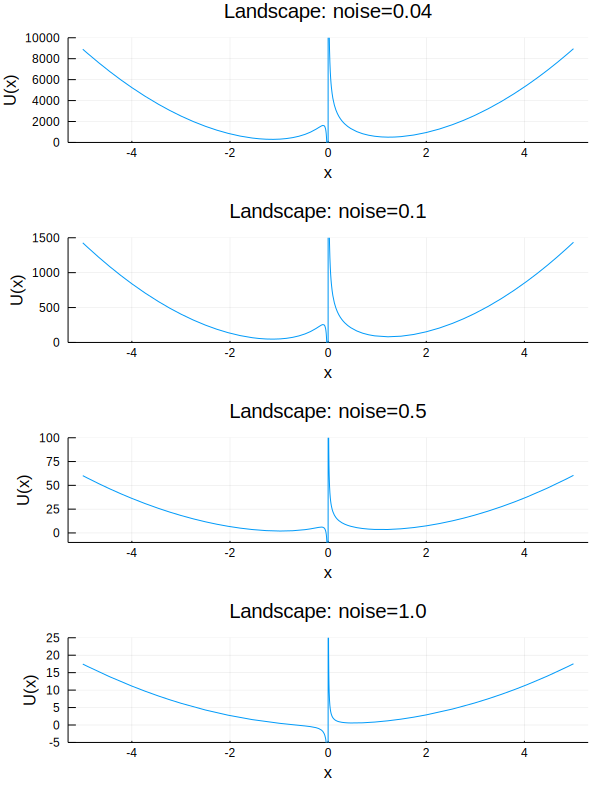

In [13]:
###########################
# LANDSCAPE - NOT LOG SCALE
###########################

α = 0.04
f1_land_1(x) = 2log(abs(x)) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
total_land_1 = plot(f1_land_1,ylims=(0.0,10000),title=("Landscape: noise=$α"),xlabel=("x"),ylabel=("U(x)"),legend=false)

α = 0.1
f1_land_2(x) = 2log(abs(x)) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
total_land_2 = plot(f1_land_2,ylims=(0.0,1500),title=("Landscape: noise=$α"),xlabel=("x"),ylabel=("U(x)"),legend=false)

α = 0.5
f1_land_3(x) = 2log(abs(x)) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
total_land_3 = plot(f1_land_3,ylims=(-10,100),title=("Landscape: noise=$α"),xlabel=("x"),ylabel=("U(x)"),legend=false)

α = 1.0
f1_land_4(x) = 2log(abs(x)) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
total_land_4 = plot(f1_land_4,ylims=(-5,25),title=("Landscape: noise=$α"),xlabel=("x"),ylabel=("U(x)"),legend=false)

final_land = plot(total_land_1,total_land_2,total_land_3,total_land_4,layout=(4,1),size=(600,800))

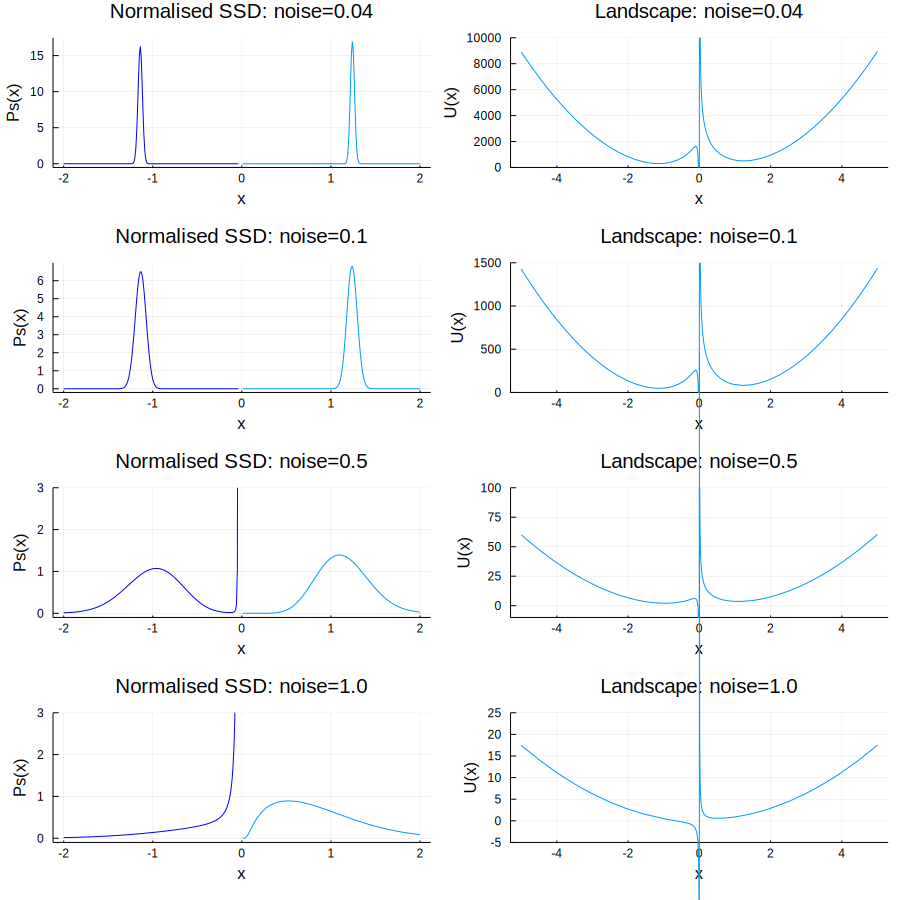

In [14]:
plot(final_ssd,final_land,size=(900,900))

In [ ]:
# HOWEVER: IT NOW SHOWS THE NEGATIVE STATIONARY POINT AS BEING THE DEEPER WELL WHICH IS THE OPPOSITE IN THE 
# POTENTIAL FUNCTION - SEE FIRST CELL
# DOES THIS HAVE TO DO WITH NOT OBTAINING THE LOG VERSION OR IS IT SIMPLY AN ANNOYING THING ABOUT MULTIPLICATIVE
# NOISE???

# AND WE ALSO CAN'T RECOVER A LANDSCAPE FOR LEVELS OF NOISE [-0.3-0.0] WHICH IS WHERE OUR SOLUTION IS UNDEFINED FOR
# SOME REASON - WHY?

In [15]:
# But when try and recover both sides by adding abs(x) and logging the yaxis it won't plot
# This is definitely got to do with the yaxis=:log because 

α = 0.1
f1_land(x) = 2log(abs(x)) + (a1*x^2)/(α^2) - (2*b1*x)/(α^2) - (2*c1*log(abs(x))/α^2) + (2*d1)/(α^2*x)
plot(f1_land,yaxis=:log)

DomainError: DomainError with -77.4647714137144:
NaN result for non-NaN input.

In [ ]:
# WE CAN SEE THAT WITH HIGH NOISE THE STABLE STATIONARY POINTS SHIFT OR EVEN DISAPPEAR

# IF WE RUN THIS ENTIRE NOTEBOOK WITH D=0.0 THEN WE SEE THAT WITH HIGH NOISE WE ARE DRIVEN FROM A BISTABLE SYSTEM TO
# A MONOSTABLE SYSTEM

In [269]:
#######################
# Re-run with d=0.0
# Symetrical about zero
#######################

# We see that with high levels of noise the system changes from a bistable system to a monostable system

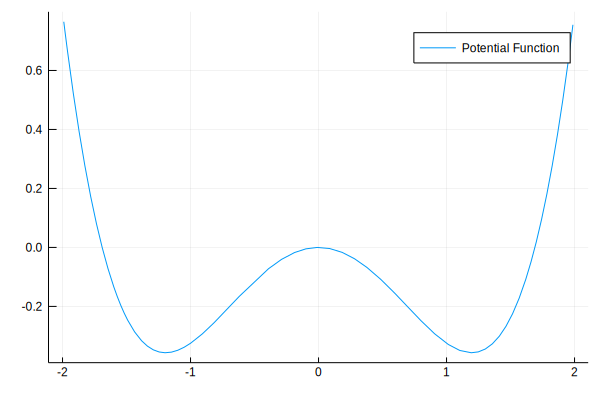

In [15]:
#########################################
# Potential function (V): 
# (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x
#########################################

a2=0.7
b2=0.0
c2=1.0
d2=0.0

j(x) = (a2*x^4)/4 - (b2*x^3)/3 - (c2*x^2)/2 - d2*x

plot(j, -2.0, 2.0, label=("Potential Function"))

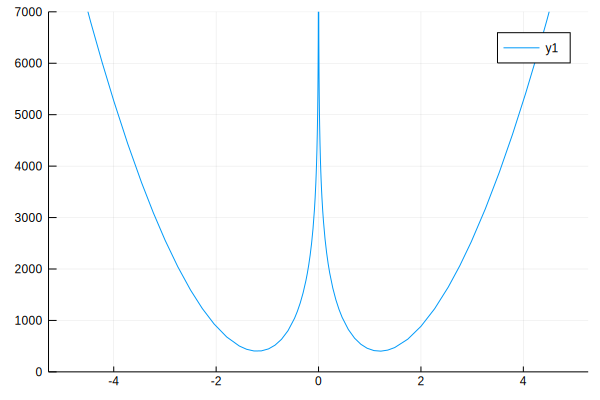

In [16]:
####################
# LANDSCAPE RECOVERY
####################

# LOW NOISE
α = 0.04
f1_land_0(x) = 2log(abs(x)) + (a2*x^2)/(α^2) - (2*b2*x)/(α^2) - (2*c2*log(abs(x))/α^2) + (2*d2)/(α^2*x)
plot(f1_land_0,ylims=(0.0,7000))

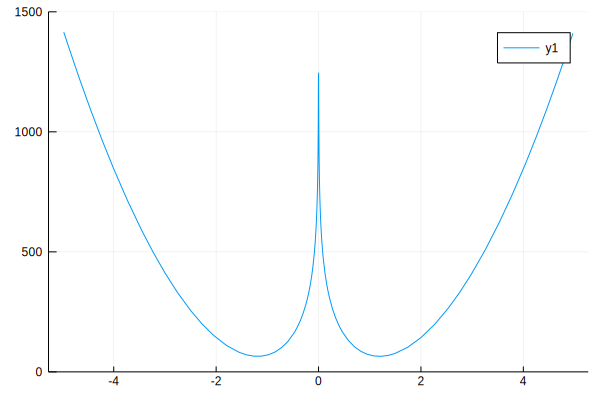

In [17]:
# MEDIUM NOISE
α = 0.1
f1_land_0(x) = 2log(abs(x)) + (a2*x^2)/(α^2) - (2*b2*x)/(α^2) - (2*c2*log(abs(x))/α^2) + (2*d2)/(α^2*x)
plot(f1_land_0,ylims=(0.0,1500))

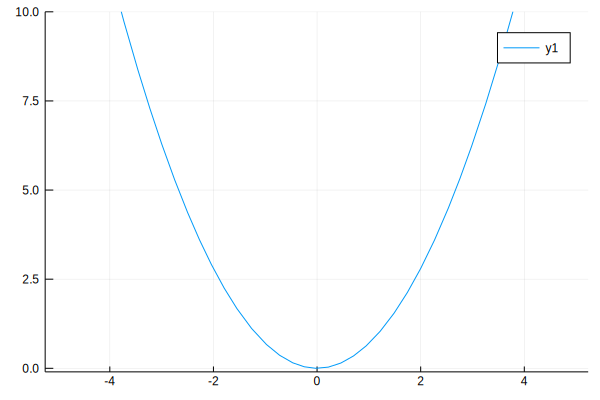

In [18]:
# HIGH NOISE
α = 1.0
f1_land_0(x) = 2log(abs(x)) + (a2*x^2)/(α^2) - (2*b2*x)/(α^2) - (2*c2*log(abs(x))/α^2) + (2*d2)/(α^2*x)
plot(f1_land_0,ylims=(-0.1,10))

In [16]:
f1_land_1(x) = 2log(x)

f1_land_1 (generic function with 1 method)